<a href="https://colab.research.google.com/github/TAkkerboom/DL2_socratic_models_team_2/blob/main/demos/test_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Socratic Models

In [1]:
# Pull the git repository
!git clone 'https://github.com/TAkkerboom/DL2_socratic_models_team_2.git'

Cloning into 'DL2_socratic_models_team_2'...
remote: Enumerating objects: 450, done.
remote: Counting objects: 100% (7/7), done.
remote: Compressing objects: 100% (6/6), done.
remote: Total 450 (delta 1), reused 7 (delta 1), pack-reused 443
Receiving objects: 100% (450/450), 1.27 MiB | 7.21 MiB/s, done.
Resolving deltas: 100% (249/249), done.


In [2]:
! nvidia-smi

Thu May 25 14:59:05 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   56C    P8    10W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [3]:
! free -h

              total        used        free      shared  buff/cache   available
Mem:           12Gi       698Mi       8.4Gi       1.0Mi       3.6Gi        11Gi
Swap:            0B          0B          0B


In [4]:
! lscpu

Architecture:                    x86_64
CPU op-mode(s):                  32-bit, 64-bit
Byte Order:                      Little Endian
Address sizes:                   46 bits physical, 48 bits virtual
CPU(s):                          2
On-line CPU(s) list:             0,1
Thread(s) per core:              2
Core(s) per socket:              1
Socket(s):                       1
NUMA node(s):                    1
Vendor ID:                       GenuineIntel
CPU family:                      6
Model:                           63
Model name:                      Intel(R) Xeon(R) CPU @ 2.30GHz
Stepping:                        0
CPU MHz:                         2299.998
BogoMIPS:                        4599.99
Hypervisor vendor:               KVM
Virtualization type:             full
L1d cache:                       32 KiB
L1i cache:                       32 KiB
L2 cache:                        256 KiB
L3 cache:                        45 MiB
NUMA node0 CPU(s):               0,1
Vulnerability 

In [5]:
# Install dependencies
!pip install -q transformers accelerate sentencepiece gradio

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.1/7.1 MB 55.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 219.1/219.1 kB 22.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 79.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.9/19.9 MB 86.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 11.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 58.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 70.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.0/57.0 kB 7.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 288.1/288.1 kB 31.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.4/75.4 kB 9.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.5/50.5 kB 6.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.8/135.8 kB 18.7 MB/s eta 0:00:0

In [6]:
%cd DL2_socratic_models_team_2/
!pwd

/content/DL2_socratic_models_team_2
/content/DL2_socratic_models_team_2


## Load Raven Progressive Matrices

In [8]:
from src.dataset import Raven

# load the Raven Progressive matrices 
test_set = Raven('./center_single_subset', 'test', '')
test_set.load_data()

Loading item: 0
Loading item: 1
Loading item: 2
Loading item: 3
Loading item: 4
Loading item: 5
Loading item: 6
Loading item: 7


### Plottin Puzzle

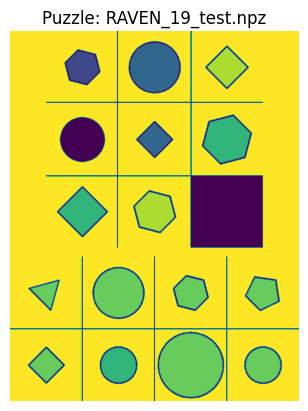

In [9]:
# change the variable PUZZLE_NUMBER to see different puzzles
PUZZLE_NUMBER = 4
test_set.plot_puzzle(PUZZLE_NUMBER)

# Let the Socratic Model solve it

In [10]:
from main import Demo
SM = Demo(test_set, None)

In [11]:
SM.load_VLM()

loading vlm...


In [ ]:
SM.load_LM()

loading lm...


In [ ]:
#@title Prediction by SM

# outputs prediction by the Socratic Model
puzzle = test_set.get_puzzle(PUZZLE_NUMBER)
SocraticModel.forward(puzzle)